In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("BreastCancerWc.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.columns = ["Code","Clump-Thickness","Uniformity-of-Cell-Size","Uniformity-of-Cell-Shape","Marginal-Adhesion","Single-Epithelial-Cell-Size","Bare-Nuclei","Bland-Chromatin","Normal-Nucleoli","Mitoses","Class"]

In [5]:
df.head()

,Code,Clump-Thickness,Uniformity-of-Cell-Size,Uniformity-of-Cell-Shape,Marginal-Adhesion,Single-Epithelial-Cell-Size,Bare-Nuclei,Bland-Chromatin,Normal-Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Cleaning

In [6]:
df.isna().sum()

Code                           0
Clump-Thickness                0
Uniformity-of-Cell-Size        0
Uniformity-of-Cell-Shape       0
Marginal-Adhesion              0
Single-Epithelial-Cell-Size    0
Bare-Nuclei                    0
Bland-Chromatin                0
Normal-Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
df[df == "?"].count()

Code                            0
Clump-Thickness                 0
Uniformity-of-Cell-Size         0
Uniformity-of-Cell-Shape        0
Marginal-Adhesion               0
Single-Epithelial-Cell-Size     0
Bare-Nuclei                    16
Bland-Chromatin                 0
Normal-Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [8]:
df_q = df.replace("?", np.nan)
df_q

,Code,Clump-Thickness,Uniformity-of-Cell-Size,Uniformity-of-Cell-Shape,Marginal-Adhesion,Single-Epithelial-Cell-Size,Bare-Nuclei,Bland-Chromatin,Normal-Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [9]:
df_q.isna().sum()

Code                            0
Clump-Thickness                 0
Uniformity-of-Cell-Size         0
Uniformity-of-Cell-Shape        0
Marginal-Adhesion               0
Single-Epithelial-Cell-Size     0
Bare-Nuclei                    16
Bland-Chromatin                 0
Normal-Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Code                         699 non-null    int64 
 1   Clump-Thickness              699 non-null    int64 
 2   Uniformity-of-Cell-Size      699 non-null    int64 
 3   Uniformity-of-Cell-Shape     699 non-null    int64 
 4   Marginal-Adhesion            699 non-null    int64 
 5   Single-Epithelial-Cell-Size  699 non-null    int64 
 6   Bare-Nuclei                  699 non-null    object
 7   Bland-Chromatin              699 non-null    int64 
 8   Normal-Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [13]:
df_q["Bare-Nuclei"] = df_q["Bare-Nuclei"].astype(float)

In [15]:
df = df_q.replace(np.nan, df_q.mean())
df.isna().sum()

Code                           0
Clump-Thickness                0
Uniformity-of-Cell-Size        0
Uniformity-of-Cell-Shape       0
Marginal-Adhesion              0
Single-Epithelial-Cell-Size    0
Bare-Nuclei                    0
Bland-Chromatin                0
Normal-Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [16]:
df_n = (df < 0).any(axis = 1)
df = df[~df_n]

In [25]:
df.head()

,Code,Clump-Thickness,Uniformity-of-Cell-Size,Uniformity-of-Cell-Shape,Marginal-Adhesion,Single-Epithelial-Cell-Size,Bare-Nuclei,Bland-Chromatin,Normal-Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


# Error Correcting

In [26]:
from scipy.stats import zscore

In [27]:
def remove_outlier_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean())/data.std())
    out = z_scores > 3
    data = data[~out.all(axis=1)]
    return data

remove_outlier_zscore(df)

,Code,Clump-Thickness,Uniformity-of-Cell-Size,Uniformity-of-Cell-Shape,Marginal-Adhesion,Single-Epithelial-Cell-Size,Bare-Nuclei,Bland-Chromatin,Normal-Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [28]:
z_score = zscore(df)
z_score_abs = np.abs(z_score)
df = df[~(z_score_abs > 3).any(axis=1)]
df.head()

,Code,Clump-Thickness,Uniformity-of-Cell-Size,Uniformity-of-Cell-Shape,Marginal-Adhesion,Single-Epithelial-Cell-Size,Bare-Nuclei,Bland-Chromatin,Normal-Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [29]:
df.shape

(646, 11)

# Data Transformation

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

X = df.drop('Class', axis=1)  # Exclude the target variable 'Class'

# 1. Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Normalization using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 3. Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Specify the number of components to reduce to
X_pca = pca.fit_transform(X)

# Print the shape of transformed data after each transformation
print("Shape after Feature Scaling:", X_scaled.shape)
print("Shape after Normalization:", X_normalized.shape)
print("Shape after Dimensionality Reduction (PCA):", X_pca.shape)

Shape after Feature Scaling: (646, 10)
Shape after Normalization: (646, 10)
Shape after Dimensionality Reduction (PCA): (646, 2)


In [36]:
df.loc[df['Class'] == 2, 'Class'] = 'Y'
df.loc[df['Class'] == 4, 'Class'] = 'N'
df.head()

,Code,Clump-Thickness,Uniformity-of-Cell-Size,Uniformity-of-Cell-Shape,Marginal-Adhesion,Single-Epithelial-Cell-Size,Bare-Nuclei,Bland-Chromatin,Normal-Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,Y
1,1002945,5,4,4,5,7,10.0,3,2,1,Y
2,1015425,3,1,1,1,2,2.0,3,1,1,Y
3,1016277,6,8,8,1,3,4.0,3,7,1,Y
4,1017023,4,1,1,3,2,1.0,3,1,1,Y


In [37]:
df['Class'].unique()

array(['Y', 'N'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Class'])
le.classes_

df['Class'] = le.transform(df['Class'])

In [41]:
df.head()

,Code,Clump-Thickness,Uniformity-of-Cell-Size,Uniformity-of-Cell-Shape,Marginal-Adhesion,Single-Epithelial-Cell-Size,Bare-Nuclei,Bland-Chromatin,Normal-Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,1
1,1002945,5,4,4,5,7,10.0,3,2,1,1
2,1015425,3,1,1,1,2,2.0,3,1,1,1
3,1016277,6,8,8,1,3,4.0,3,7,1,1
4,1017023,4,1,1,3,2,1.0,3,1,1,1


# Model Building

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x = df.iloc[:, 0:10]
y = df['Class']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [49]:
print(x.shape)
x_train.shape

(646, 10)


(484, 10)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### LogisticRegression

In [51]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

LogisticRegression()

In [52]:
y_pred_logReg = logReg.predict(x_test)

Accuracy Score (Logistic Regression) :  0.7283950617283951


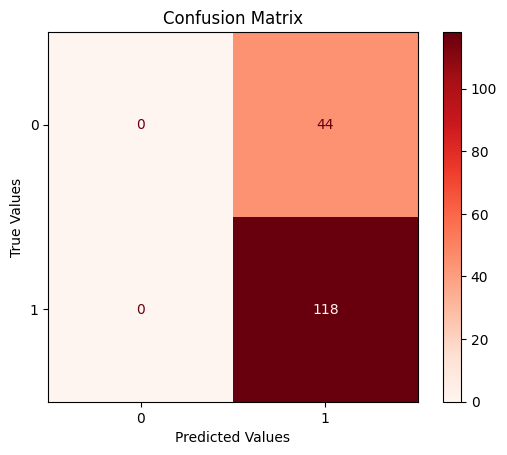

In [55]:
print("Accuracy Score (Logistic Regression) : ", accuracy_score(y_test, y_pred_logReg))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logReg)).plot(cmap="Reds", xticks_rotation="horizontal")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes

In [56]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [57]:
y_pred_nb = naive_bayes.predict(x_test)

Accuracy Score (Naive Bayes) :  0.8271604938271605


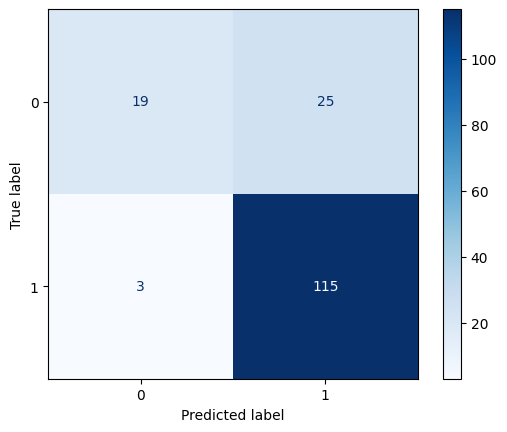

In [58]:
print("Accuracy Score (Naive Bayes) : ", accuracy_score(y_test, y_pred_nb))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb)).plot(cmap="Blues", xticks_rotation="horizontal")
plt.show()

### K-Nearest Neighbors

In [59]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred_knn = knn.predict(x_test)

Accuracy Score (KNN) :  0.6111111111111112


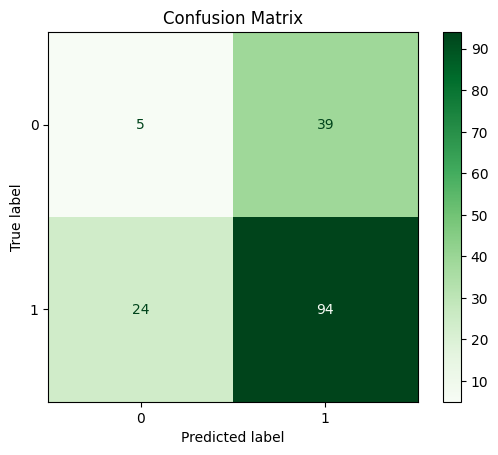

In [61]:
print("Accuracy Score (KNN) : ", accuracy_score(y_test, y_pred_knn))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot(cmap="Greens", xticks_rotation="horizontal")
plt.title("Confusion Matrix")
plt.show()